# Explore here

In [16]:
# Your code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pickle import dump

# Cargar el dataset limpio
file_path = "https://raw.githubusercontent.com/LexoBrunett/ML-web-app-Flask-Lex-Brunett-Chavez/refs/heads/main/data/raw/Brocoli.csv"
brocoli_data_cleaned = pd.read_csv(file_path, skiprows=2, header=1)

# Renombrar columnas para mayor claridad
brocoli_data_cleaned.columns = [
    "Year",
    "Planted_Acres",
    "Harvested_Acres",
    "Yield_Cwt",
    "Production_1000Cwt",
    "Price_Per_Unit_Cwt",
    "Total_Value_1000USD"
]

# Convertir columnas con comas a formato numérico
columns_to_clean = ["Planted_Acres", "Harvested_Acres", "Production_1000Cwt", "Total_Value_1000USD"]
for col in columns_to_clean:
    brocoli_data_cleaned[col] = brocoli_data_cleaned[col].str.replace(",", "").astype(float)


In [17]:


# Crear Year_Group como un rango categórico
brocoli_data_cleaned["Year_Group"] = pd.cut(brocoli_data_cleaned["Year"], bins=5)
# Convertir a string para evitar problemas con Interval
brocoli_data_cleaned["Year_Group"] = brocoli_data_cleaned["Year_Group"].astype(str)

# Verificar que no haya columnas incompatibles
X = brocoli_data_cleaned.drop(columns=["Production_1000Cwt", "Year"])  # Excluir objetivo y año
y = brocoli_data_cleaned["Production_1000Cwt"]

# Asegurarse de que todas las columnas sean numéricas o categóricas codificadas
X = pd.get_dummies(X, drop_first=True)


EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resumen estadístico
summary_stats = brocoli_data_cleaned.describe()

# Correlación entre variables
correlation_matrix = brocoli_data_cleaned.corr()

# Configurar tamaño de visualizaciones
plt.figure(figsize=(10, 6))

# Mapa de calor de la correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Evolución de la producción a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Production_1000Cwt", data=brocoli_data_cleaned, marker="o")
plt.title("Production Over Time")
plt.xlabel("Year")
plt.ylabel("Production (1000 Cwt)")
plt.grid(True)
plt.show()

# Distribución de la producción
plt.figure(figsize=(10, 6))
sns.histplot(brocoli_data_cleaned["Production_1000Cwt"], kde=True, bins=15)
plt.title("Distribution of Production")
plt.xlabel("Production (1000 Cwt)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

summary_stats


ValueError: could not convert string to float: '(1950.941, 1962.8]'

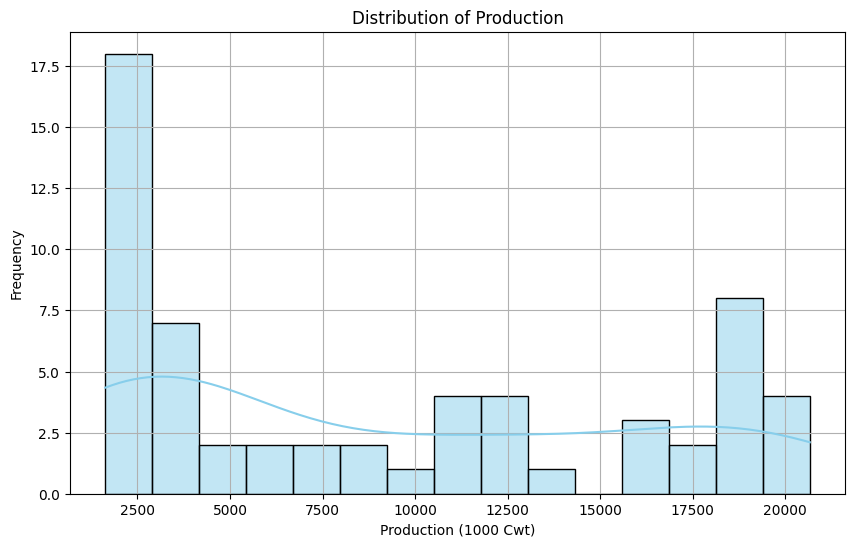

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma con KDE
plt.figure(figsize=(10, 6))
sns.histplot(brocoli_data_cleaned["Production_1000Cwt"], kde=True, bins=15, color="skyblue")
plt.title("Distribution of Production")
plt.xlabel("Production (1000 Cwt)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


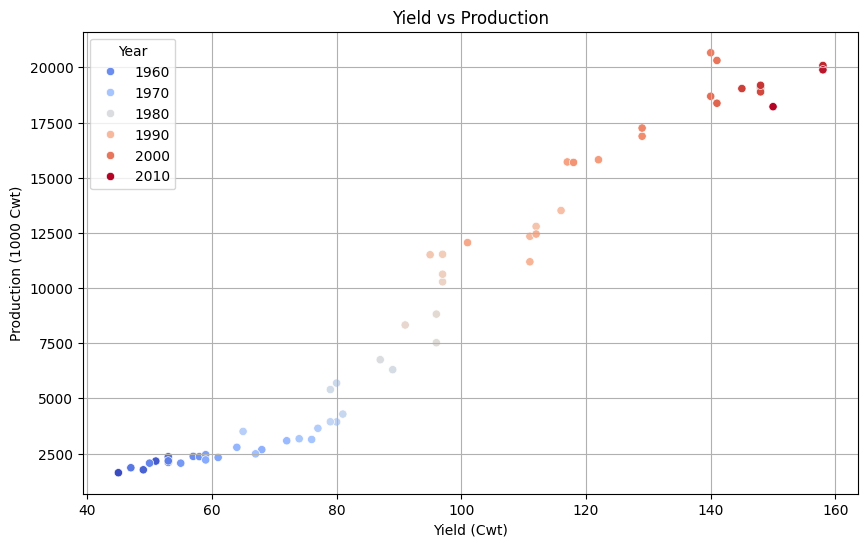

In [20]:
# Scatterplot entre Yield y Production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brocoli_data_cleaned, x="Yield_Cwt", y="Production_1000Cwt", hue="Year", palette="coolwarm")
plt.title("Yield vs Production")
plt.xlabel("Yield (Cwt)")
plt.ylabel("Production (1000 Cwt)")
plt.grid(True)
plt.show()


In [21]:
# Heatmap de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = brocoli_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


ValueError: could not convert string to float: '(1950.941, 1962.8]'

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_18432/874784437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brocoli_data_cleaned, x="Year_Group", y="Price_Per_Unit_Cwt", palette="pastel")


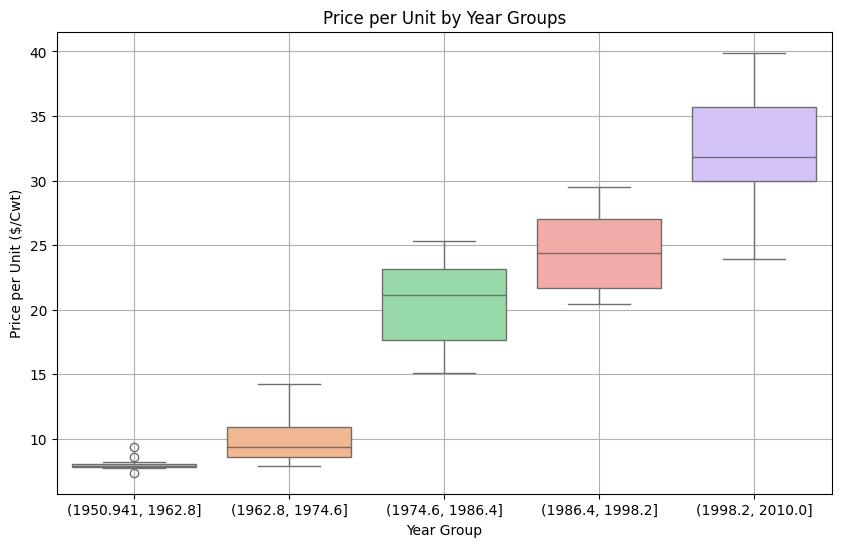

In [22]:
# Crear un rango de años categórico
brocoli_data_cleaned["Year_Group"] = pd.cut(brocoli_data_cleaned["Year"], bins=5)

# Boxplot de precios por grupos de años
plt.figure(figsize=(10, 6))
sns.boxplot(data=brocoli_data_cleaned, x="Year_Group", y="Price_Per_Unit_Cwt", palette="pastel")
plt.title("Price per Unit by Year Groups")
plt.xlabel("Year Group")
plt.ylabel("Price per Unit ($/Cwt)")
plt.grid(True)
plt.show()


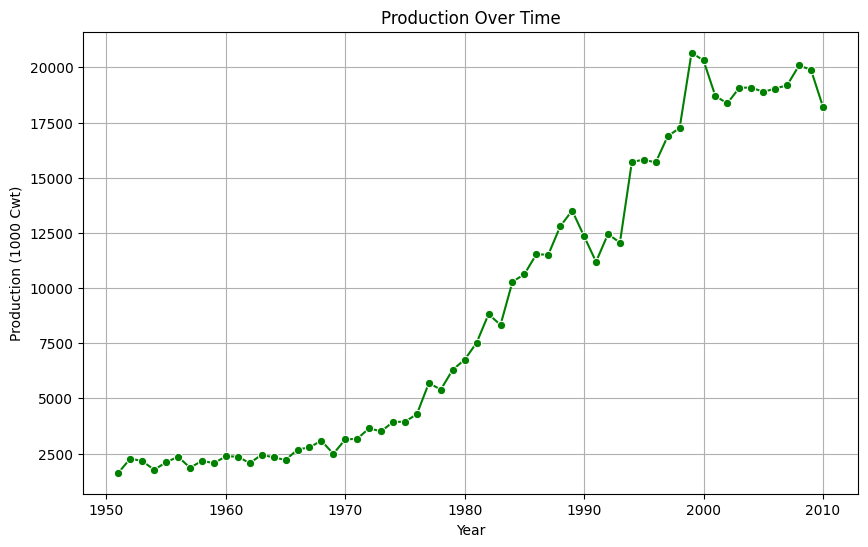

In [23]:
# Línea de tendencia de producción
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Production_1000Cwt", data=brocoli_data_cleaned, marker="o", color="green")
plt.title("Production Over Time")
plt.xlabel("Year")
plt.ylabel("Production (1000 Cwt)")
plt.grid(True)
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pickle import dump

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pickle import dump


# Verificar que no haya columnas incompatibles
X = brocoli_data_cleaned.drop(columns=["Production_1000Cwt", "Year"])  # Excluir objetivo y año
y = brocoli_data_cleaned["Production_1000Cwt"]

# Asegurarse de que todas las columnas sean numéricas o categóricas codificadas
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=60, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Guardar el modelo entrenado
model_path = "/workspaces/ML-web-app-Flask-Lex-Brunett-Chavez/models/random_forest_regressor_broccoli.sav"
dump(model, open(model_path, "wb"))

dump(model, open(model_path, "wb"))
print(f"Modelo guardado en: {model_path}")


Mean Squared Error: 827155.1450231486
Modelo guardado en: /workspaces/ML-web-app-Flask-Lex-Brunett-Chavez/models/random_forest_regressor_broccoli.sav


In [34]:
def predict_production(input_data, model_path):
    from pickle import load
    model = load(open(model_path, "rb"))
    prediction = model.predict(input_data)
    return prediction
    
# Ejemplo de uso
result = predict_production(X_test.iloc[0:1], model_path)
print(f"Predicción automatizada: {result}")


Predicción automatizada: [2197.86666667]


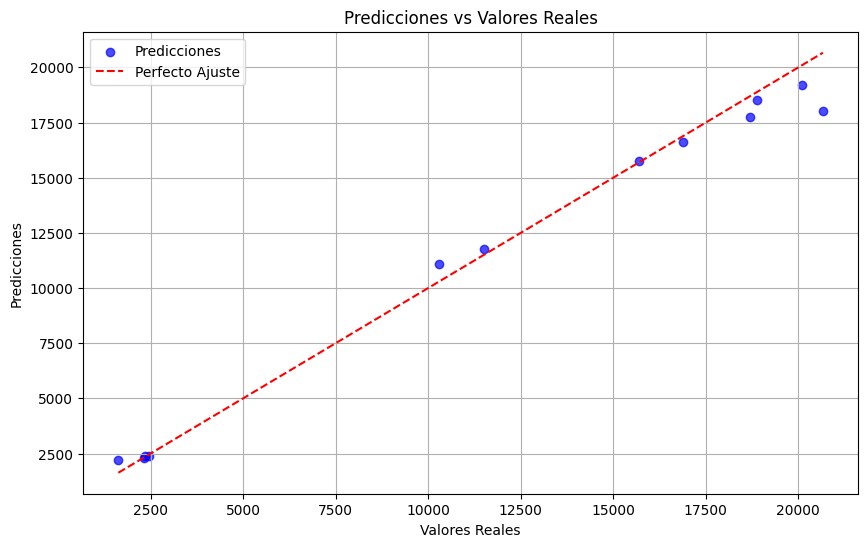

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfecto Ajuste")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.legend()
plt.grid()
plt.show()


VARIABLE IMPORTANCE

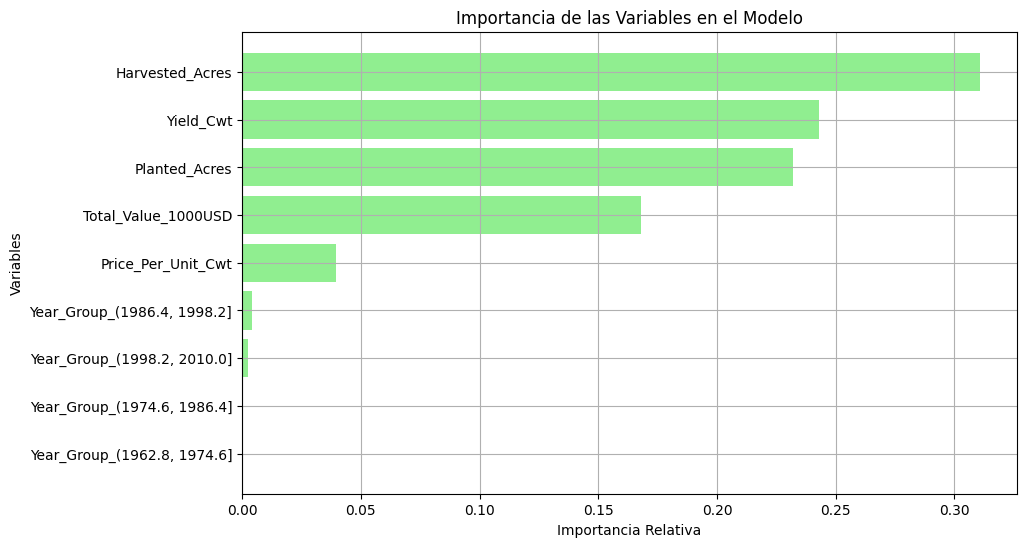

In [38]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="lightgreen")
plt.xlabel("Importancia Relativa")
plt.ylabel("Variables")
plt.title("Importancia de las Variables en el Modelo")
plt.grid()
plt.show()



In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.9849194146369539


Errors analysis

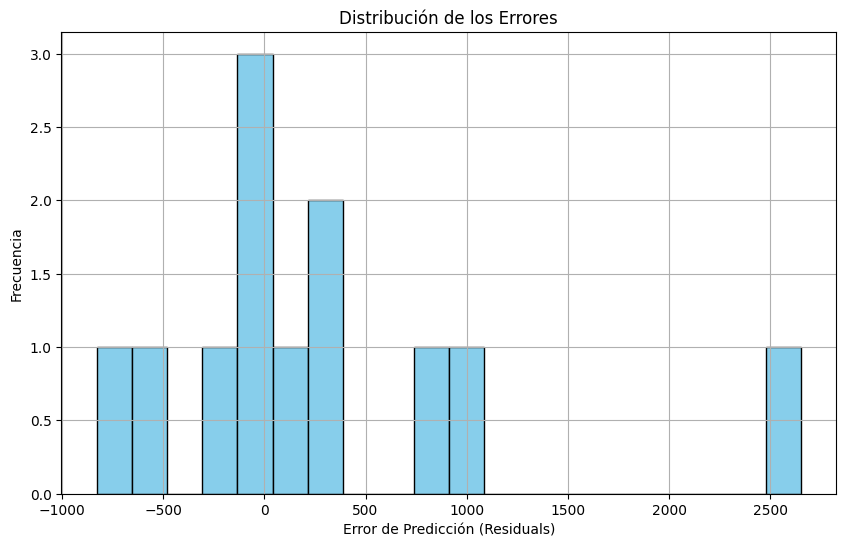

In [36]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Error de Predicción (Residuals)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.grid()
plt.show()


Cross - Validation

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"R² Scores de validación cruzada: {scores}")
print(f"Promedio R²: {scores.mean()}")


R² Scores de validación cruzada: [ -3.58510654   0.4280538    0.40933446   0.76701049 -14.51361017]
Promedio R²: -3.2988635936680937
